<a href="https://colab.research.google.com/github/1aidea/cs480student/blob/main/05/Copy_of_CS480_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

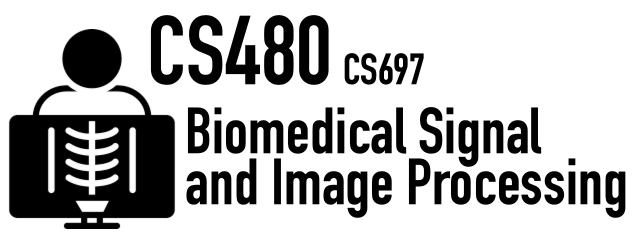
#Assignment 5

In [162]:
# In this assignment, we will visualize and explore a CT scan!

In [161]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# we are using pydicom, so lets install it!
!pip install pydicom

     |████████████████████████████████| 2.0 MB 6.8 MB/s 


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [163]:
"""
There appears to be 220 slices in the data.
"""

'\nThere appears to be 220 slices in the data.\n'

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

In [ ]:
"""
For some reason I could not load the files into SliceDrop. I kept getting
a loading screen. I tried putting all the files as well as a small subset of them
but I could not get the loading screen away.

As a result inorder to view the images in a 3D space I loaded the images 
to get each view manually using pydicom.
"""

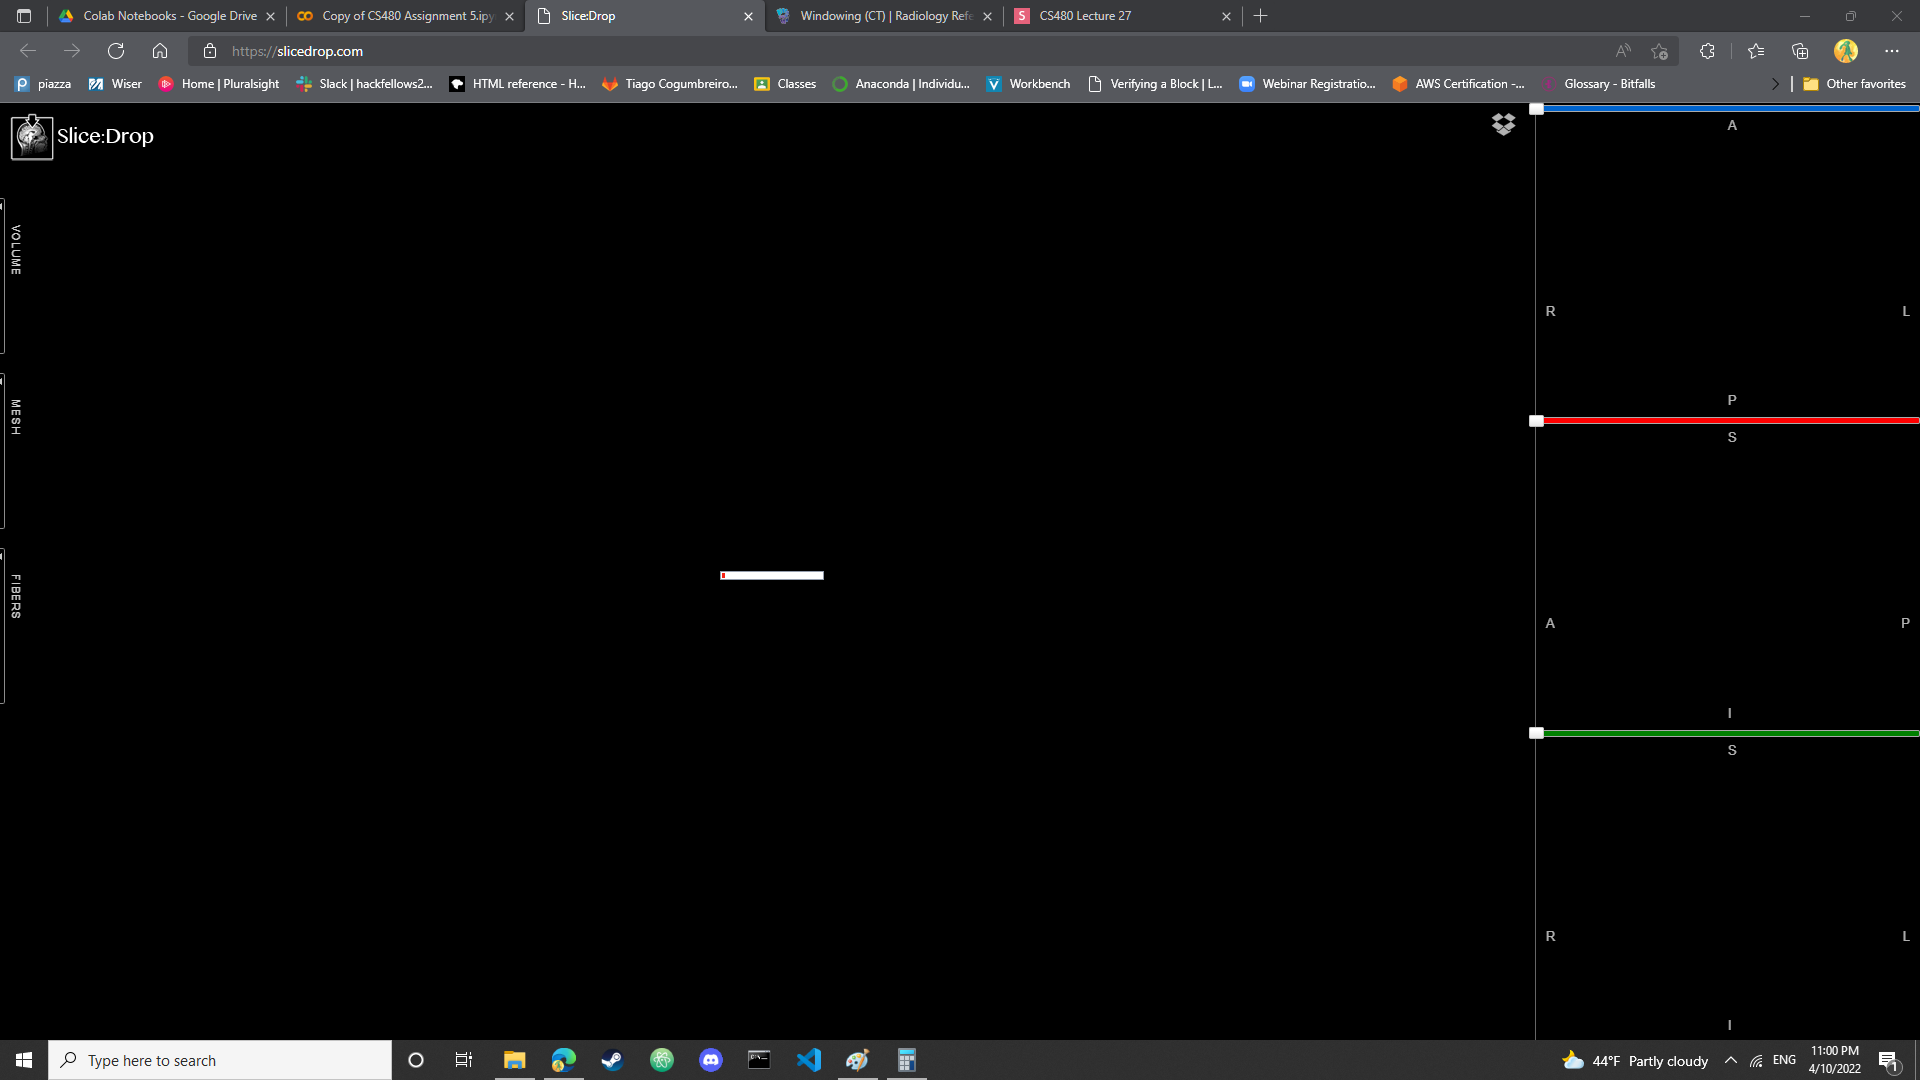

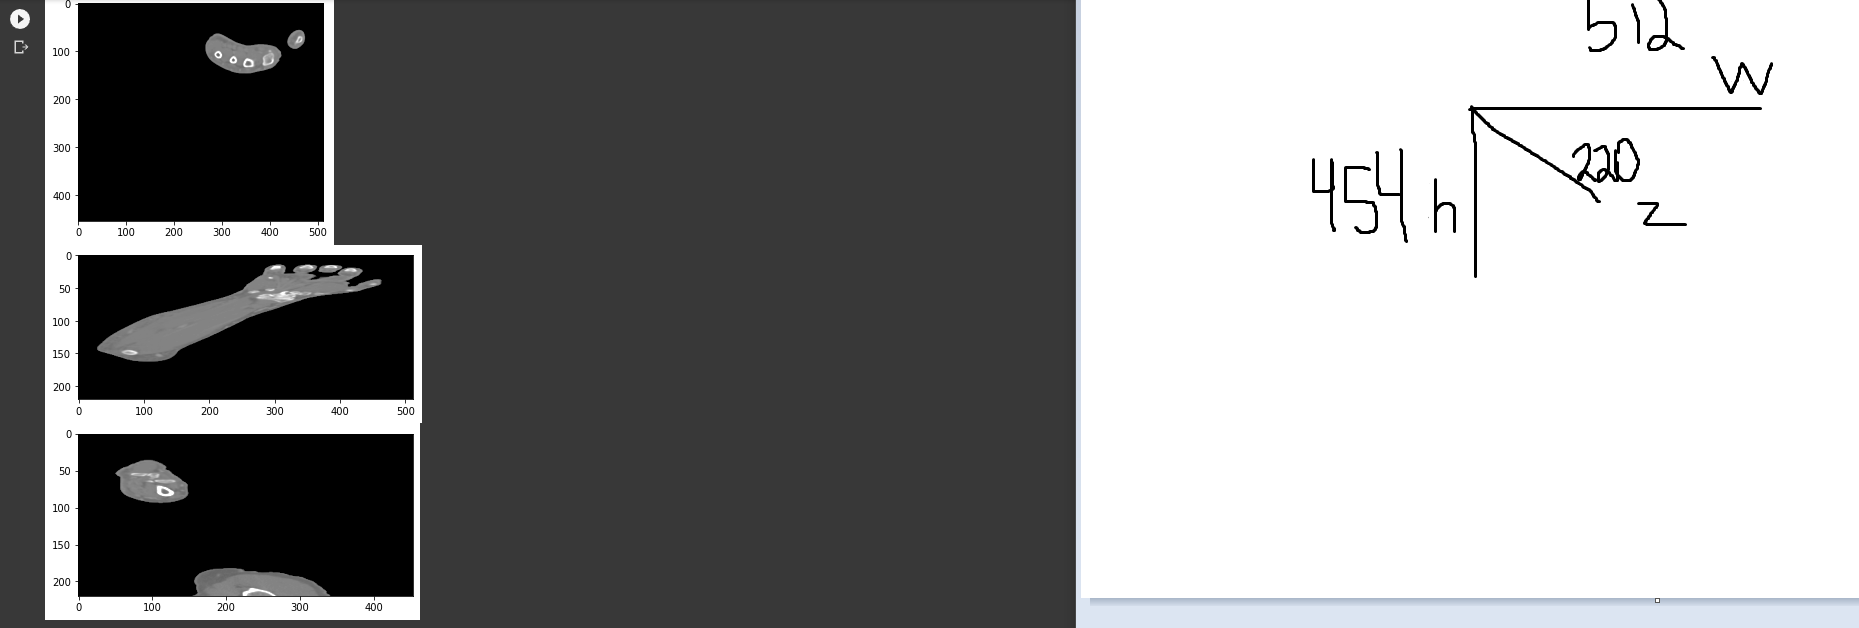

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [164]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [165]:
from pydicom import dcmread
import os

# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
files = sorted(os.listdir("ct"))
imgs = []

for i in range(size(files)):
  imgs.append(dcmread("ct/" + files[i]).pixel_array)

images = np.array(imgs)
print(images.shape)

(220, 454, 512)


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

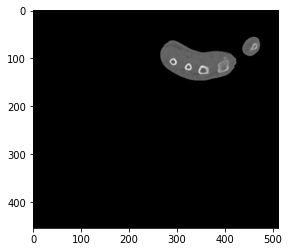

In [166]:
# TODO: YOUR CODE FOR AXIAL
AXIAL = images[40, 0:454, 0:512]
imshow(AXIAL, cmap='gray')


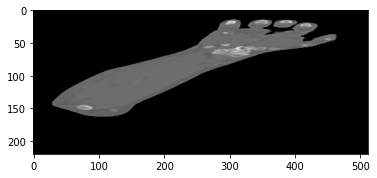

In [167]:
# TODO: YOUR CODE FOR SAGITTAL
SAGITTAL = images[0:220, 90, 0:512]
imshow(SAGITTAL, cmap='gray')


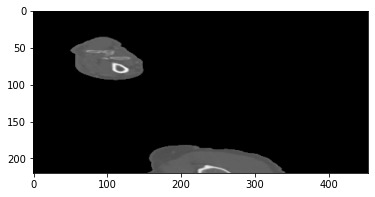

In [168]:
# TODO: YOUR CODE FOR CORONAL
CORONAL = images[0:220, 0:454, 270]
imshow(CORONAL, cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

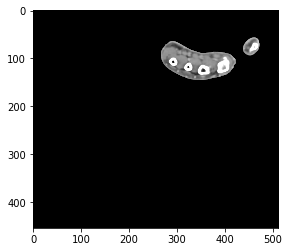

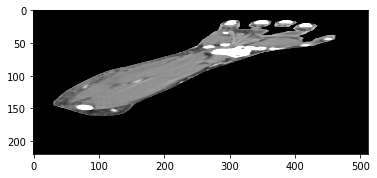

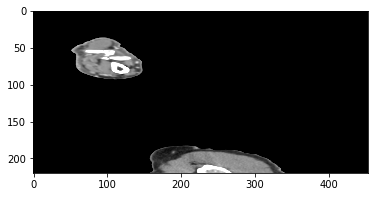

In [169]:
# TODO: YOUR CODE
level = dcmread("ct/" + files[0])["0028","1050"].value # WC
window = dcmread("ct/" + files[0])["0028","1051"].value # WW
rescale = dcmread("ct/" + files[0])["0028","1052"].value # Rescale Intercept

vmin = level - window/2
vmax = level + window/2
plt.imshow(AXIAL + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
plt.imshow(SAGITTAL + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
plt.imshow(CORONAL + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()



In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

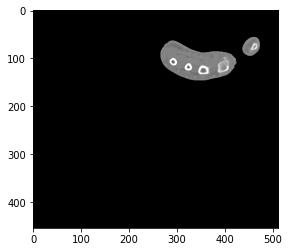

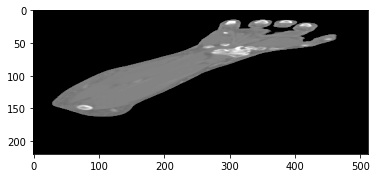

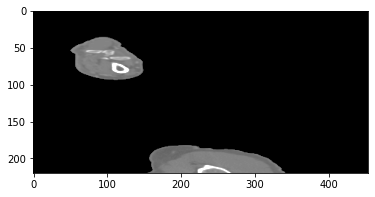

In [170]:
# TODO: YOUR CODE
Level = 400
window = 1800

vmin = level - window/2
vmax = level + window/2
plt.imshow(AXIAL + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
plt.imshow(SAGITTAL + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()
plt.imshow(CORONAL + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


In [ ]:
# Which values make sense and why?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
"""
The values such as Window = 400, level = 50 make sense as they are values
that are associated with enhancing the soft tissue of an image.

other values that make sense are Window 1800, level 400. These two values
enhance the bones in the image.

It makes sense to use these values as they would highlight certain things that
are present in our images. What would not make sense would be to use values that
are associated with things not in our image, such as the values that highlight
lungs or brains. 
"""

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.


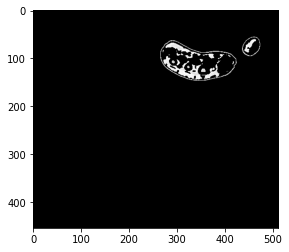

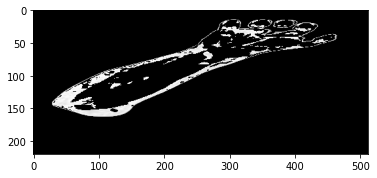

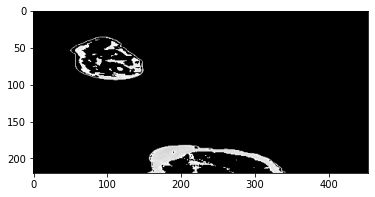

In [206]:
# TODO: YOUR CODE TO SEGMENT FAT
new_mask_AXIAL = AXIAL.copy().astype(int16)
new_mask_AXIAL[new_mask_AXIAL > 1050] = 0
new_mask_SAGITTAL = SAGITTAL.copy().astype(int16)
new_mask_SAGITTAL[new_mask_SAGITTAL > 1050] = 0
new_mask_CORONAL = CORONAL.copy().astype(int16)
new_mask_CORONAL[new_mask_CORONAL > 1050] = 0


imshow(new_mask_AXIAL, cmap='gray')
plt.show()
imshow(new_mask_SAGITTAL, cmap='gray')
plt.show()
imshow(new_mask_CORONAL, cmap='gray')
plt.show()


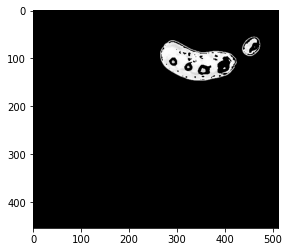

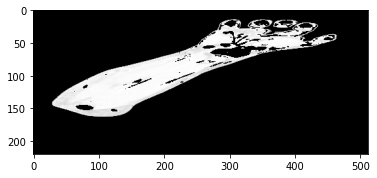

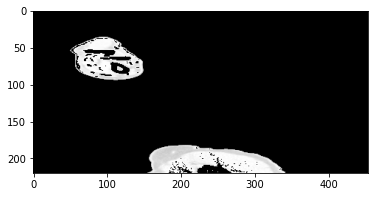

In [212]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
new_mask_AXIAL = AXIAL.copy().astype(int16)
new_mask_AXIAL[new_mask_AXIAL > 1100] = 0
new_mask_SAGITTAL = SAGITTAL.copy().astype(int16)
new_mask_SAGITTAL[new_mask_SAGITTAL > 1100] = 0
new_mask_CORONAL = CORONAL.copy().astype(int16)
new_mask_CORONAL[new_mask_CORONAL > 1100] = 0




imshow(new_mask_AXIAL, cmap='gray')
plt.show()
imshow(new_mask_SAGITTAL, cmap='gray')
plt.show()
imshow(new_mask_CORONAL, cmap='gray')
plt.show()

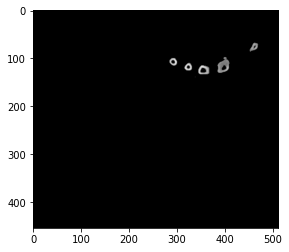

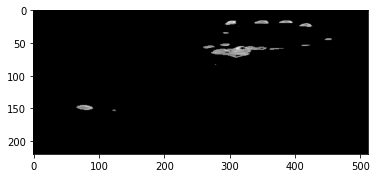

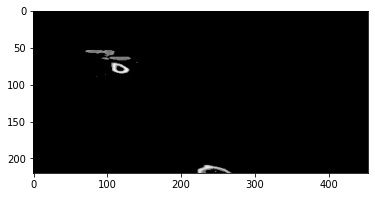

In [209]:
# TODO: YOUR CODE TO SEGMENT BONES
new_mask_AXIAL = AXIAL.copy().astype(int16)
new_mask_AXIAL[new_mask_AXIAL < 1200] = 0
new_mask_SAGITTAL = SAGITTAL.copy().astype(int16)
new_mask_SAGITTAL[new_mask_SAGITTAL < 1200] = 0
new_mask_CORONAL = CORONAL.copy().astype(int16)
new_mask_CORONAL[new_mask_CORONAL < 1200] = 0


imshow(new_mask_AXIAL, cmap='gray')
plt.show()
imshow(new_mask_SAGITTAL, cmap='gray')
plt.show()
imshow(new_mask_CORONAL, cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
"""
The image quality is alittle rough, though this may be because I dont know the 
precise range for soft tissue, bone, fat with segmentation. Overall I think it
was a good try. If the images were of higher quaity I can see it being very useful
"""

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""